In [108]:
## import python liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [109]:
## Extract the data from database 
data=pd.read_csv(r"C:\Users\pv11379\OneDrive - Deere & Co\Desktop\Personal folder\Data science\Database/iphone_purchase_records.csv")

In [110]:
## copy data into new variable
df=data.copy()

In [111]:
## shape of dataset
print("Rows in data - ",df.shape[0])
print("Columns in data - ",df.shape[1])

Rows in data -  400
Columns in data -  4


In [112]:
## top 3 rows of dataset
df.head(3)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0


In [113]:
## bottom 3 rows of dataset
df.tail(3)

,Gender,Age,Salary,Purchase Iphone
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


In [114]:
## detail information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [115]:
## index of dataset
df.index

RangeIndex(start=0, stop=400, step=1)

In [116]:
## columns in dataset
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [117]:
## statistical analysis of dataset
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## average age - 37 years and average salary - 69742 Rs.
## Min age - 18 yr, max age - 60Yr
## Min salary - 15000Rs, max salary - 150000Rs

In [118]:
## number of unique values in dataset
print(df.nunique())
print("Gender having unique values - ",df['Gender'].unique())
print("Purchase IPhone having unique values - ",df['Purchase Iphone'].unique())

Gender               2
Age                 43
Salary             117
Purchase Iphone      2
dtype: int64
Gender having unique values -  ['Male' 'Female']
Purchase IPhone having unique values -  [0 1]


## Gender having 2 unique values - Male and Female
## Purchase Iphone having 2 unique values - 0(No), 1(yes)

In [119]:
## data types in dataset
df.dtypes

Gender             object
Age                 int64
Salary              int64
Purchase Iphone     int64
dtype: object

## Gender column having object datatype and remaining others having integer datatype.

In [120]:
## any null values in dataset
df.isna().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

## No null values in data

# verify for outliers in data

In [121]:
## any outliers in dataset
# numeric columns in data
ncol= df.columns[df.dtypes!='O']
ncol

Index(['Age', 'Salary', 'Purchase Iphone'], dtype='object')

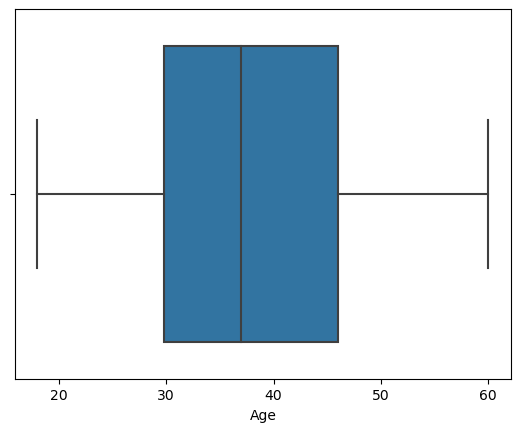

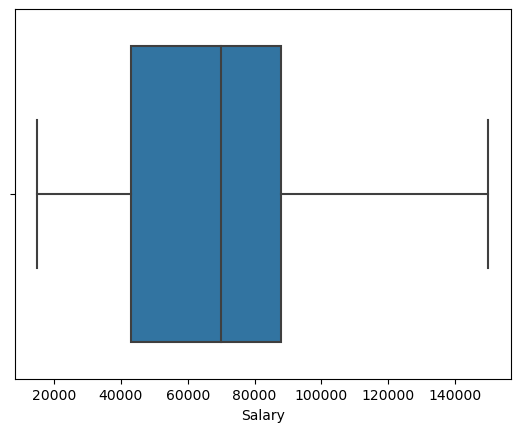

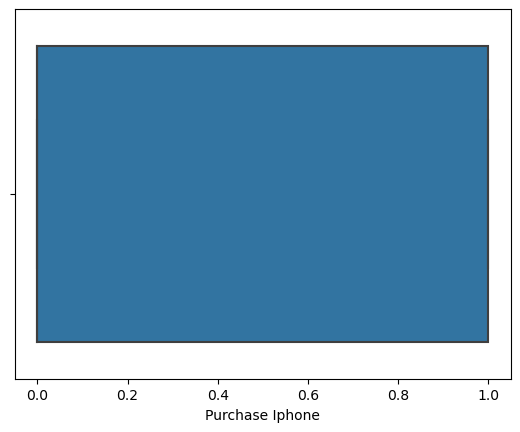

In [122]:
for i in ncol:
    plt.figure()
    sns.boxplot(x=df[i])

## In given dataset, outliers are not available. So it is free from outliers.

In [123]:
df['Gender'].value_counts(normalize=True)*100

Female    51.0
Male      49.0
Name: Gender, dtype: float64

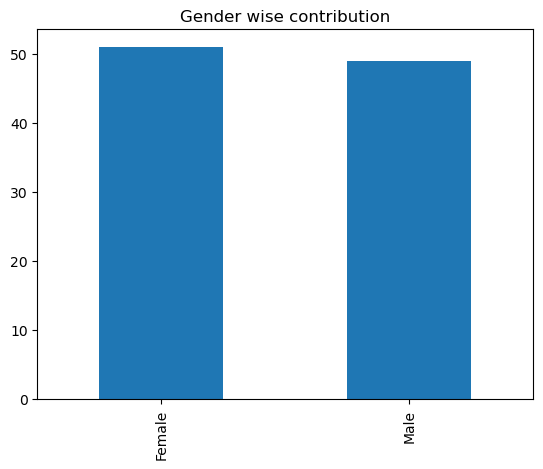

In [229]:
(df['Gender'].value_counts(normalize=True)*100).plot(kind='bar')
plt.title('Gender wise contribution')
plt.show()

## In dataset, females are 51% and males are 49%.

In [124]:
genderwise_avg_age = round(df.groupby('Gender')['Age'].mean(),0)
print("Female average age is - ",genderwise_avg_age[0])
print("Male avergae age is - ",genderwise_avg_age[1])

Female average age is -  38.0
Male avergae age is -  37.0


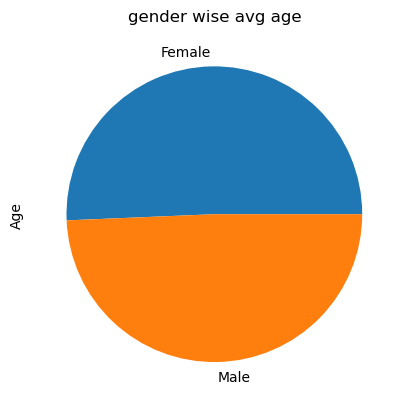

In [228]:
genderwise_avg_age.plot(kind='pie')
plt.title('gender wise avg age')
plt.show()

## female average is more than male average age.

In [125]:
genderwise_max_age = round(df.groupby('Gender')['Age'].max(),0)
print("Female max age is - ",genderwise_max_age[0])
print("Male max age is - ",genderwise_max_age[1])

Female max age is -  60
Male max age is -  60


In [126]:
genderwise_min_age = round(df.groupby('Gender')['Age'].min(),0)
print("Female min age is - ",genderwise_min_age[0])
print("Male min age is - ",genderwise_min_age[1])

Female min age is -  18
Male min age is -  18


In [127]:
genderwise_avg_salary = round(df.groupby('Gender')['Salary'].mean(),0)
print("Female average salary is - ",genderwise_avg_salary[0])
print("Male avergae salary is - ",genderwise_avg_salary[1])

Female average salary is -  71760.0
Male avergae salary is -  67643.0


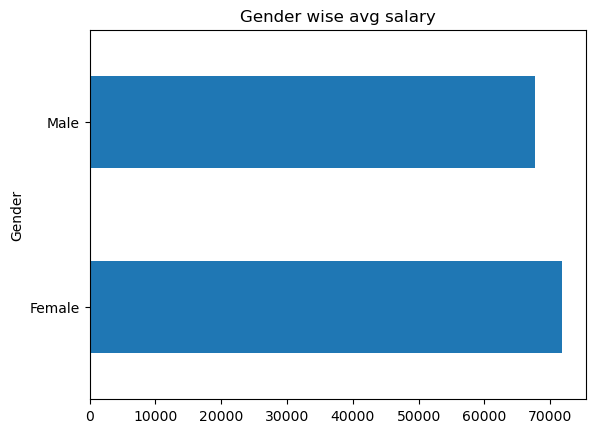

In [226]:
genderwise_avg_salary.plot(kind='barh')
plt.title('Gender wise avg salary')
plt.show()

## female average salary is more than male average salary.

In [128]:
genderwise_max_salary = round(df.groupby('Gender')['Salary'].max(),0)
print("Female max salary is - ",genderwise_max_salary[0])
print("Male max salary is - ",genderwise_max_salary[1])

Female max salary is -  150000
Male max salary is -  150000


In [129]:
genderwise_min_salary = round(df.groupby('Gender')['Salary'].min(),0)
print("Female min salary is - ",genderwise_min_salary[0])
print("Male min salary is - ",genderwise_min_salary[1])

Female min salary is -  15000
Male min salary is -  15000


In [130]:
print("Total Iphone purchased are - ",df['Purchase Iphone'].value_counts()[1])

Total Iphone purchased are -  143


In [131]:
df.groupby('Gender')['Purchase Iphone'].sum()

Gender
Female    77
Male      66
Name: Purchase Iphone, dtype: int64

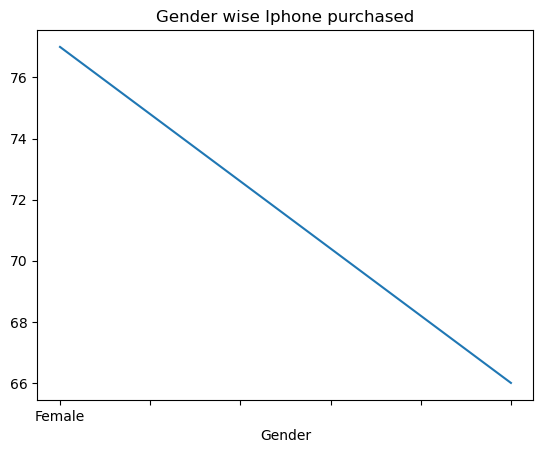

In [225]:
df.groupby('Gender')['Purchase Iphone'].sum().plot()
plt.title("Gender wise Iphone purchased")
plt.show()

## Iphone purchased - Female 77 no's (out of 204) and male 66 no's(out of 196)

In [132]:
## Iphone purchased data filtered from dataset as df1

df1= df[df['Purchase Iphone']==1]
df1


,Gender,Age,Salary,Purchase Iphone
7,Female,32,150000,1
16,Male,47,25000,1
17,Male,45,26000,1
18,Male,46,28000,1
19,Female,48,29000,1
...,...,...,...,...
393,Male,60,42000,1
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1


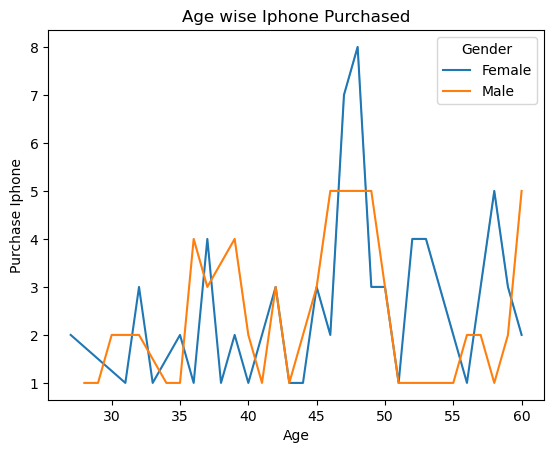

In [133]:
sns.lineplot(data=df1,x='Age',y='Purchase Iphone',estimator='sum',hue='Gender')
plt.title('Age wise Iphone Purchased')
plt.show()
             

## maximum Iphone purchased by age - 46 to 50 years
## Female - between 47 to 48 years
## Male - between 46 to 50 and at 60 years.

In [140]:
agewise_salary=pd.DataFrame(df1.groupby(['Age','Gender'])['Salary'].sum(),columns=['Salary'])

<Axes: xlabel='Age', ylabel='Salary'>

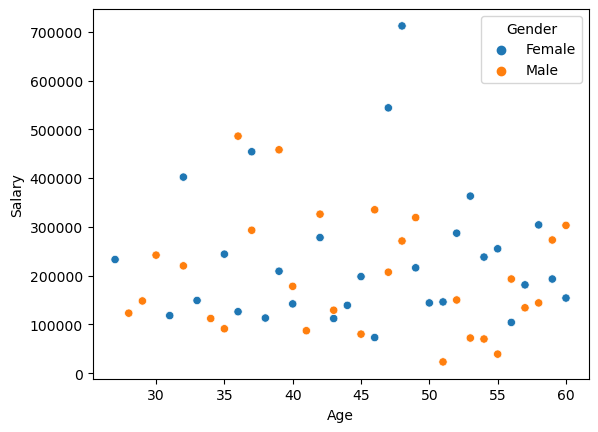

In [143]:
sns.scatterplot(data=agewise_salary,x='Age',y='Salary',hue='Gender')

## There is no any correlation in salary and age in case of both male and female.

C:\Users\pv11379\AppData\Local\Temp\ipykernel_37540\158208961.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


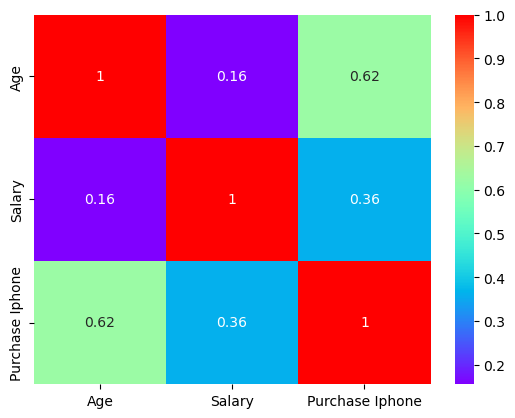

In [230]:
correlation = df.corr()
sns.heatmap(correlation,annot=True,cmap='rainbow')
plt.show()

## As per correlation table, only Age is having good correlation with Purchase Iphone.

# KNN machine learning model 

In [155]:
df.head(3) ## top 3 rows of dataset

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0


In [164]:
## convert categorical column gender into numerical using get dummies data.
df_dummy=pd.get_dummies(df['Gender'])

In [165]:
## concatenate df and df_dummy
df_final=pd.concat([df,df_dummy],axis=1)

In [167]:
df_final

,Gender,Age,Salary,Purchase Iphone,Female,Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1
2,Female,26,43000,0,1,0
3,Female,27,57000,0,1,0
4,Male,19,76000,0,0,1
...,...,...,...,...,...,...
395,Female,46,41000,1,1,0
396,Male,51,23000,1,0,1
397,Female,50,20000,1,1,0
398,Male,36,33000,0,0,1


## in above dataset, Gender/Age/Salary is independent variable and Purchase Iphone is dependent variable. It is label dataset.
## It is fall under supervised machine learning.
## In dataset, there are Two class in dependent variable - one is 0 i.e not purchase and one is 1 i.e purchase.
## It is fall under classification supervised machine learning. 

# Import Scikit liabrary

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Scalling of dataset

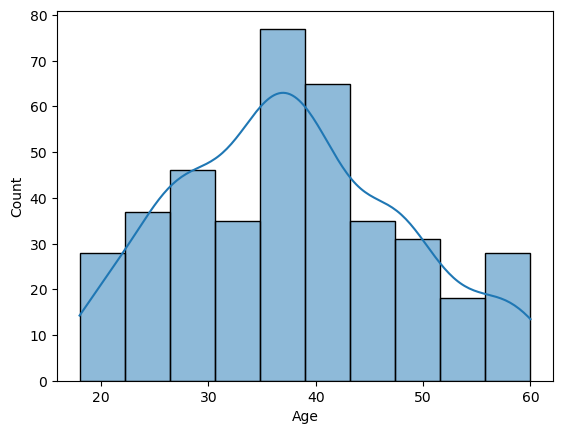

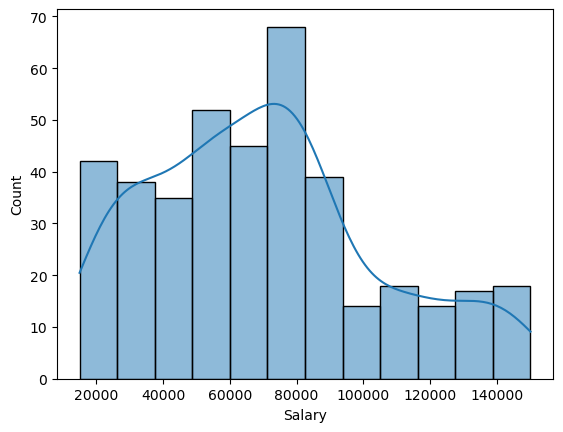

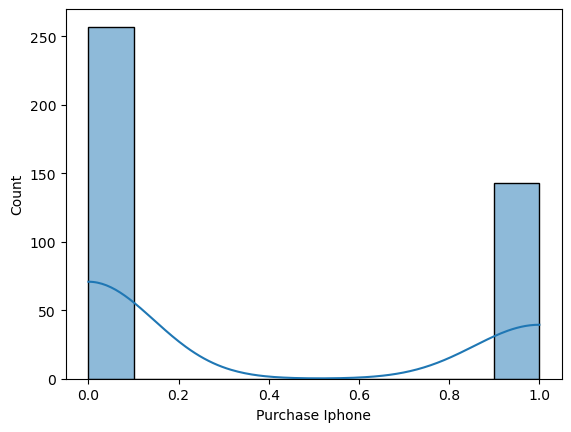

In [159]:
## verify distribution of dataset
for i in ncol:
    plt.figure()
    sns.histplot(df[i],kde=True)

## Dataset is normally distributed. So Standardscaller will use for scalling of dataset.

In [176]:
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import accuracy_score,confusion_matrix

In [168]:
## identify independent and dependent variable
x=df_final[['Female','Male','Age','Salary']]
y=df_final['Purchase Iphone']

In [169]:
## scalling of x variable using standard scaller
sc_x=StandardScaler()
sc_x.fit_transform(x)

array([[-1.02020406,  1.02020406, -1.78179743, -1.49004624],
       [-1.02020406,  1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606, -0.98019606,  1.17910958, -1.46068138],
       [-1.02020406,  1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606, -0.98019606,  1.08359645, -0.99084367]])

In [171]:
## split the dataset into train,test
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80,random_state=1234)

In [172]:
## shape of split data
x_train.shape,y_train.shape

((320, 4), (320,))

In [173]:
x_test.shape,y_test.shape

((80, 4), (80,))

# Model Building

In [175]:
## find K values by standard method 
k1=sqrt(df_final.shape[0])
k1
## it is even value, so we can consider 19 or 21.

20.0

In [178]:
## find k values by error method/elbow method
error=[]
for i in range(1,31):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train)
    predict_i=clf.predict(x_test)
    error.append(1-accuracy_score(y_test,predict_i))

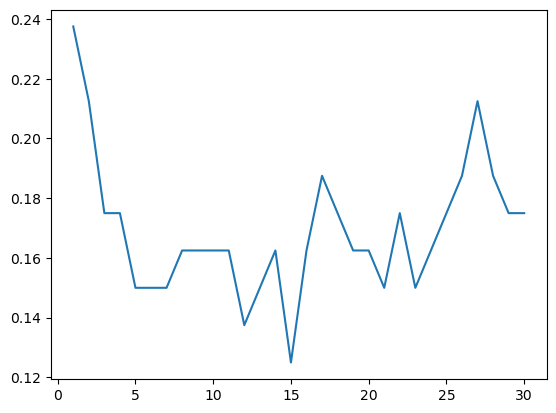

In [181]:
plt.plot(range(1,31),error)
plt.show()

## lowest error values is at 15, so as per error method we can consider best K values is 15.

In [196]:
model=KNeighborsClassifier(n_neighbors=15)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [197]:
## predict dependent variable 
y_pred=model.predict(x_test)

In [198]:
## check accuracy score of predict vs actual
accuracy_score(y_test,y_pred)

0.875

In [199]:
## check confusion matrix of predict vs actual
confusion_matrix(y_test,y_pred)

array([[50,  3],
       [ 7, 20]], dtype=int64)

<Axes: >

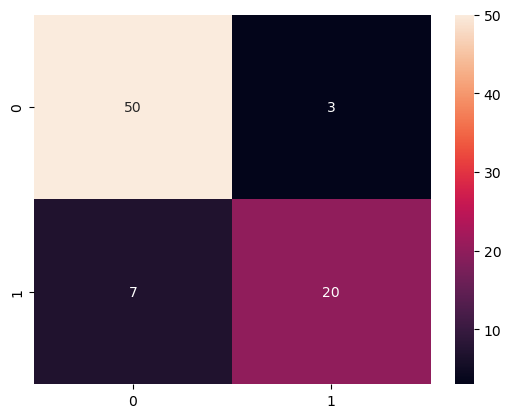

In [200]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [201]:
## check model with K value 19.
model1=KNeighborsClassifier(n_neighbors=19)
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [202]:
## predict dependent variable 
y_pred1=model1.predict(x_test)

In [203]:
## check accuracy score of predict vs actual
accuracy_score(y_test,y_pred1)

0.8375

## accuracy score is less than K value 15.

In [204]:
##check model with K value 21.
model2=KNeighborsClassifier(n_neighbors=21)
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [205]:
## predict dependent variable 
y_pred2=model2.predict(x_test)

In [206]:
## check accuracy score of predict vs actual
accuracy_score(y_test,y_pred2)

0.85

## accuracy score is less than k value 15.

# So accuracy score of K=15 is more, so i am considering this model is better to predict dependent variable.

In [207]:
model

KNeighborsClassifier(n_neighbors=15)

In [208]:
## to save model, importing joblib
import joblib

In [209]:
filename='iphone_KNN_Project.sav'

In [210]:
joblib.dump(model,filename)

['iphone_KNN_Project.sav']